In [ ]:
import pandas as pd
import seaborn as sns

from sklearn import preprocessing

In [ ]:
data_1 = pd.read_excel('/content/drive/MyDrive/Rostelecom_Test/df_1_free.xlsx')

In [ ]:
data_2 = pd.read_excel('/content/drive/MyDrive/Rostelecom_Test/df_2.xlsx')

In [ ]:
total_data = data_1.merge(data_2, how='inner', on='tab_n')

# Preprocessing

Проверка наличия пропусков и дубликатов в наборе данных

In [ ]:
total_data.isna().sum()

Дата_x                    0
tab_n                     0
Должность_x               0
prof_group                0
Пол                       0
Регион                    0
Возраст                   0
Схема премирования        0
is_leave               3386
Дата_y                    0
Блок                      0
exp                       0
Категория персонала       0
Образование               0
Должность_y               0
Код функции               0
Кол-во единиц             0
Статус назначения         0
dtype: int64

In [ ]:
total_data.duplicated().sum()

0

In [ ]:
total_data.columns

Index(['Дата_x', 'tab_n', 'Должность_x', 'prof_group', 'Пол', 'Регион',
       'Возраст', 'Схема премирования', 'is_leave', 'Дата_y', 'Блок', 'exp',
       'Категория персонала', 'Образование', 'Должность_y', 'Код функции',
       'Кол-во единиц', 'Статус назначения'],
      dtype='object')

In [ ]:
total_data = total_data.drop(columns=['Дата_y', 'Должность_y'])

In [ ]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84447 entries, 0 to 84446
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Дата_x               84447 non-null  datetime64[ns]
 1   tab_n                84447 non-null  int64         
 2   Должность_x          84447 non-null  int64         
 3   prof_group           84447 non-null  object        
 4   Пол                  84447 non-null  int64         
 5   Регион               84447 non-null  int64         
 6   Возраст              84447 non-null  int64         
 7   Схема премирования   84447 non-null  object        
 8   is_leave             81061 non-null  float64       
 9   Блок                 84447 non-null  int64         
 10  exp                  84447 non-null  float64       
 11  Категория персонала  84447 non-null  object        
 12  Образование          84447 non-null  object        
 13  Код функции          84447 non-

In [ ]:
total_data.describe()

,tab_n,Должность_x,Пол,Регион,Возраст,is_leave,Блок,exp,Код функции,Кол-во единиц,Статус назначения
count,84447.000000,84447.000000,84447.000000,84447.000000,84447.000000,81061.000000,84447.000000,84447.000000,84447.000000,84447.000000,84447.000000
mean,42223.000000,152.669876,0.537603,13.370339,39.264130,0.019368,19.332611,0.150130,81.206378,0.957537,0.140052
std,24377.893428,83.657583,0.498587,7.841142,9.889093,0.137816,8.686704,0.157788,45.113032,0.203052,0.610759
min,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21111.500000,73.000000,0.000000,6.000000,32.000000,0.000000,14.000000,0.027276,44.000000,1.000000,0.000000
50%,42223.000000,168.000000,1.000000,11.000000,38.000000,0.000000,18.000000,0.105377,80.000000,1.000000,0.000000
75%,63334.500000,232.000000,1.000000,17.000000,45.000000,0.000000,25.000000,0.225765,117.000000,1.000000,0.000000
max,84446.000000,274.000000,1.000000,35.000000,82.000000,1.000000,37.000000,1.000000,171.000000,2.000000,3.000000


In [ ]:
total_data['Статус назначения'].value_counts()

0    79768
3     3517
1     1048
2      114
Name: Статус назначения, dtype: int64

In [ ]:
total_data['Схема премирования'].value_counts()

Нет           71807
схема 39       5442
схема 38       4406
схема 85        754
схема 46        313
схема 62        204
схема 34        187
схема 83        149
схема 76        130
схема 50        126
схема 92        106
схема 47        106
схема 99         90
схема 51         80
схема 58         70
схема 88         62
схема 74         48
схема 86         37
схема 37         33
схема 41         26
схема 77         25
схема 95         21
схема 78         20
схема 70         15
схема 101        15
схема 48         15
схема 96         14
схема 111        13
схема 87         12
схема 84         10
схема 89         10
схема 45         10
схема 75         10
схема 56          8
схема 93          7
схема 97          5
схема 71          5
схема 102         5
схема 94          5
схема 90          5
схема 100         5
схема 49          4
схема 108         4
схема 115         4
схема 106         4
схема 112         4
схема 61          3
схема 117         3
схема 12          2
схема 81          2


In [ ]:
total_data['Должность_x'].value_counts()

232    15763
73     15084
168     7183
26      5914
215     4229
       ...  
273        1
122        1
149        1
23         1
88         1
Name: Должность_x, Length: 275, dtype: int64

Если существуют признаки с высокой стпенью корреляции, это может привести к снижению качества будущей модели классификатора. Проверим присутствуют ли такие признаки.

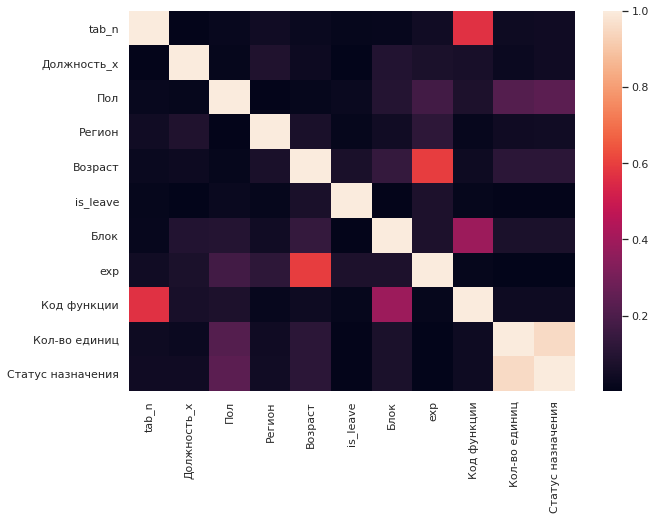

In [ ]:
corr = total_data.corr().abs()
sns.set(rc={'figure.figsize':(10, 7)})
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Обнаружены признаки с высокой корреляцией, удалим один из них.

In [ ]:
total_data = total_data.drop(columns=['Статус назначения'])

Поиск выбросов и аномалий.

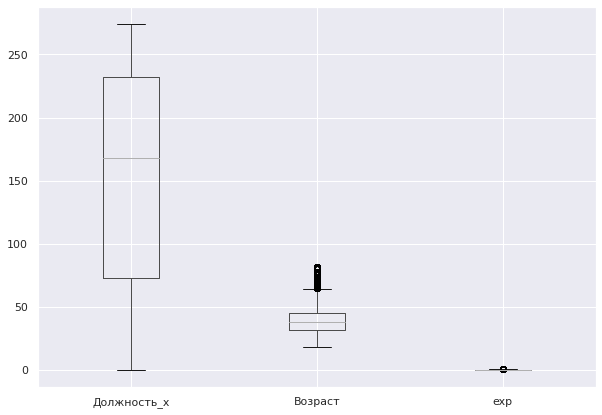

In [ ]:
total_data[['Должность_x', 'Возраст', 'exp']].boxplot()

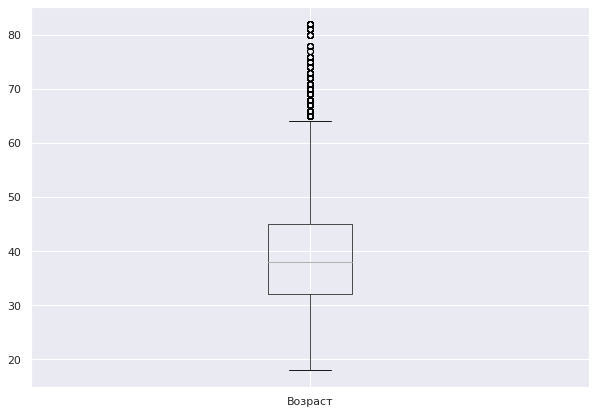

In [ ]:
total_data[['Возраст']].boxplot()

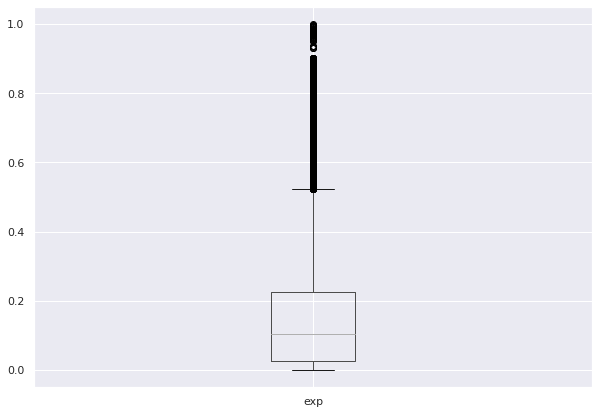

In [ ]:
total_data[['exp']].boxplot()

In [ ]:
total_data

,Дата_x,tab_n,Должность_x,prof_group,Пол,Регион,Возраст,Схема премирования,is_leave,Блок,exp,Категория персонала,Образование,Код функции,Кол-во единиц
0,2018-01-31,764,256,Нет,0,34,29,Нет,0.0,37,0.126962,Специалисты,Высшее образование,26,0.0
1,2018-01-31,1752,210,Нет,1,5,27,Нет,0.0,25,0.020801,Специалисты,Высшее образование,4,1.0
2,2018-01-31,1508,186,Нет,1,7,58,Нет,0.0,7,0.052394,Руководители,Высшее образование,38,1.0
3,2018-01-31,891,76,Нет,1,17,49,Нет,0.0,3,0.319074,Руководители,Высшее образование,17,1.0
4,2018-01-31,920,231,Нет,1,2,54,Нет,0.0,0,0.112245,Руководители,Среднее (полное) общее образование,32,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84442,2020-07-31,83928,270,Руководители,0,11,37,Нет,NaN,14,0.014914,Специалисты,Высшее образование,72,1.0
84443,2020-07-31,82065,73,Специалисты высшего уровня квалификации,0,32,49,Нет,NaN,33,0.119505,Специалисты,Высшее образование,143,1.0
84444,2020-07-31,82268,171,Руководители,0,22,31,Нет,NaN,19,0.144035,Руководители,Высшее образование,110,1.0
84445,2020-07-31,84118,232,Руководители,0,5,29,Нет,NaN,25,0.009223,Руководители,Высшее образование,123,1.0


In [ ]:
new_data = pd.concat([total_data[['Дата_x', 'tab_n', 'Пол', 'Возраст', 'Кол-во единиц', 'exp']], 
                      pd.get_dummies(total_data[['Должность_x', 'prof_group', 'Регион', 'Схема премирования', 
                                                 'Блок', 'Категория персонала', 'Образование', 'Код функции']].astype(object))], axis=1)

In [ ]:
new_data

,Дата_x,tab_n,Пол,Возраст,Кол-во единиц,exp,Должность_x_0,Должность_x_1,Должность_x_2,Должность_x_3,Должность_x_4,Должность_x_5,Должность_x_6,Должность_x_7,Должность_x_8,Должность_x_9,Должность_x_10,Должность_x_11,Должность_x_12,Должность_x_13,Должность_x_14,Должность_x_15,Должность_x_16,Должность_x_17,Должность_x_18,Должность_x_19,Должность_x_20,Должность_x_21,Должность_x_22,Должность_x_23,Должность_x_24,Должность_x_25,Должность_x_26,Должность_x_27,Должность_x_28,Должность_x_29,Должность_x_30,Должность_x_31,Должность_x_32,Должность_x_33,...,Код функции_132,Код функции_133,Код функции_134,Код функции_135,Код функции_136,Код функции_137,Код функции_138,Код функции_139,Код функции_140,Код функции_141,Код функции_142,Код функции_143,Код функции_144,Код функции_145,Код функции_146,Код функции_147,Код функции_148,Код функции_149,Код функции_150,Код функции_151,Код функции_152,Код функции_153,Код функции_154,Код функции_155,Код функции_156,Код функции_157,Код функции_158,Код функции_159,Код функции_160,Код функции_161,Код функции_162,Код функции_163,Код функции_164,Код функции_165,Код функции_166,Код функции_167,Код функции_168,Код функции_169,Код функции_170,Код функции_171
0,2018-01-31,764,0,29,0.0,0.126962,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2018-01-31,1752,1,27,1.0,0.020801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2018-01-31,1508,1,58,1.0,0.052394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2018-01-31,891,1,49,1.0,0.319074,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2018-01-31,920,1,54,1.0,0.112245,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84442,2020-07-31,83928,0,37,1.0,0.014914,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
84443,2020-07-31,82065,0,49,1.0,0.119505,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
84444,2020-07-31,82268,0,31,1.0,0.144035,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
84445,2020-07-31,84118,0,29,1.0,0.009223,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Проведём нормализацию данных.

In [ ]:
x = new_data[['Возраст', 'Кол-во единиц', 'exp']].values

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()

In [ ]:
x_scaled = min_max_scaler.fit_transform(x)

In [ ]:
x_scaled = pd.DataFrame(x_scaled)

In [ ]:
x_scaled.columns = ['Возраст', 'Кол-во единиц', 'exp']

In [ ]:
new_data = pd.concat([new_data.drop(columns=['Возраст', 'Кол-во единиц', 'exp']), x_scaled], axis=1)

In [ ]:
new_data['is_leave'] = total_data.is_leave

In [ ]:
new_data

,Дата_x,tab_n,Пол,Должность_x_0,Должность_x_1,Должность_x_2,Должность_x_3,Должность_x_4,Должность_x_5,Должность_x_6,Должность_x_7,Должность_x_8,Должность_x_9,Должность_x_10,Должность_x_11,Должность_x_12,Должность_x_13,Должность_x_14,Должность_x_15,Должность_x_16,Должность_x_17,Должность_x_18,Должность_x_19,Должность_x_20,Должность_x_21,Должность_x_22,Должность_x_23,Должность_x_24,Должность_x_25,Должность_x_26,Должность_x_27,Должность_x_28,Должность_x_29,Должность_x_30,Должность_x_31,Должность_x_32,Должность_x_33,Должность_x_34,Должность_x_35,Должность_x_36,...,Код функции_136,Код функции_137,Код функции_138,Код функции_139,Код функции_140,Код функции_141,Код функции_142,Код функции_143,Код функции_144,Код функции_145,Код функции_146,Код функции_147,Код функции_148,Код функции_149,Код функции_150,Код функции_151,Код функции_152,Код функции_153,Код функции_154,Код функции_155,Код функции_156,Код функции_157,Код функции_158,Код функции_159,Код функции_160,Код функции_161,Код функции_162,Код функции_163,Код функции_164,Код функции_165,Код функции_166,Код функции_167,Код функции_168,Код функции_169,Код функции_170,Код функции_171,Возраст,Кол-во единиц,exp,is_leave
0,2018-01-31,764,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.171875,0.0,0.126962,0.0
1,2018-01-31,1752,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.140625,0.5,0.020801,0.0
2,2018-01-31,1508,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.625000,0.5,0.052394,0.0
3,2018-01-31,891,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.484375,0.5,0.319074,0.0
4,2018-01-31,920,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.562500,0.5,0.112245,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84442,2020-07-31,83928,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.296875,0.5,0.014914,NaN
84443,2020-07-31,82065,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.484375,0.5,0.119505,NaN
84444,2020-07-31,82268,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.203125,0.5,0.144035,NaN
84445,2020-07-31,84118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.171875,0.5,0.009223,NaN


# ML

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
test_data = new_data[total_data['Дата_x'] == '2020-07-31']

In [ ]:
train_data = new_data[total_data['Дата_x'] != '2020-07-31']

Наблюдается дисбаланс классов в целевом признаке. Примем во внимание данный факт, во время выбора модели машинного обученияю

In [ ]:
train_data.is_leave.value_counts()

0.0    79491
1.0     1570
Name: is_leave, dtype: int64

In [ ]:
X_train = train_data.drop(columns=['is_leave'])

In [ ]:
y_train = train_data.is_leave

In [ ]:
X_test = test_data.drop(columns=['is_leave'])

Построим модель градиентного бустинга.

In [ ]:
clf = GradientBoostingClassifier(max_depth=10)

In [ ]:
clf.fit(X_train.drop(columns=['Дата_x', 'tab_n']), y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Проведём кросс валидацию, для проверки модели на переобученность

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(clf, X_train.drop(columns=['Дата_x', 'tab_n']), y_train, cv=5)

array([0.97057916, 0.97582038, 0.97637552, 0.97779423, 0.97464841])

Признаков переобученности не обнаружено

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_train, clf.predict(X_train.drop(columns=['Дата_x', 'tab_n'])))

0.8789683116792375

In [ ]:
predictions = clf.predict(X_test.drop(columns=['Дата_x', 'tab_n']))

# Results

In [ ]:
for_Rostelecom = X_test[['Дата_x', 'tab_n']].reset_index(drop=True)

In [ ]:
for_Rostelecom['is_leave'] = predictions

In [ ]:
for_Rostelecom.to_csv('Leaving_predictions.csv', sep='#')